In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score

In [69]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
categorical = ['Car_Name','Fuel_Type','Seller_Type','Transmission']
encodings = []

In [7]:
for feature in categorical:
    le = LabelEncoder()
    encoding = le.fit_transform(df[feature])
    encodings.append(dict(zip(list(df[feature]),encoding)))
    df[feature] = encoding

In [10]:
y = df['Selling_Price']
df = df.drop(['Selling_Price'], axis=1)

In [12]:
X = df.to_numpy() 
y = y.to_numpy()

In [23]:
X.shape, y.shape

((301, 8), (301,))

In [39]:
mu = X.mean(0) 
sigma = X.std(0) # standard deviation: max(x)-min(x)
xn = (X - mu) / sigma

In [40]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [41]:
model = LinearRegression()
model.fit(xn,y)

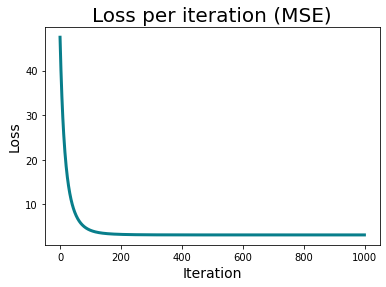

In [42]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

In [43]:
y_pred = model.predict(xn)
r2_score(y,y_pred)

0.8785587234589181

In [44]:
import pickle

In [54]:
LR = {'weights': model.weights,
      'bias': model.bias,
     'mean': mu,
     'std': sigma}

for i,j in enumerate(categorical):
    LR[j] = encodings[i]

In [56]:
pickle.dump(LR, open('LR.pkl','wb'))

In [57]:
temp = pickle.load(open('LR.pkl','rb'))

In [58]:
temp

{'weights': array([-0.05427463,  1.16341398,  3.85123529, -0.2510841 , -0.63976693,
        -0.56924376, -0.48551245, -0.16753795]),
 'bias': 4.661295673218347,
 'mean': array([6.25714286e+01, 2.01362791e+03, 7.62847176e+00, 3.69472060e+04,
        1.78737542e+00, 3.52159468e-01, 8.67109635e-01, 4.31893688e-02]),
 'std': array([2.55310191e+01, 2.88674689e+00, 8.62974446e+00, 3.88222340e+04,
        4.25093410e-01, 4.77643358e-01, 3.39456207e-01, 2.47502731e-01]),
 'Car_Name': {'ritz': 90,
  'sx4': 93,
  'ciaz': 68,
  'wagon r': 96,
  'swift': 92,
  'vitara brezza': 95,
  's cross': 91,
  'alto 800': 62,
  'ertiga': 76,
  'dzire': 73,
  'alto k10': 63,
  'ignis': 85,
  '800': 0,
  'baleno': 65,
  'omni': 89,
  'fortuner': 81,
  'innova': 86,
  'corolla altis': 71,
  'etios cross': 77,
  'etios g': 78,
  'etios liva': 80,
  'corolla': 70,
  'etios gd': 79,
  'camry': 67,
  'land cruiser': 88,
  'Royal Enfield Thunder 500': 49,
  'UM Renegade Mojave': 56,
  'KTM RC200': 42,
  'Bajaj Domin

In [73]:
tuple(df['Present_Price'].sort_values().unique())

(0.32,
 0.47,
 0.48,
 0.51,
 0.52,
 0.54,
 0.55,
 0.57,
 0.58,
 0.64,
 0.65,
 0.72,
 0.73,
 0.74,
 0.75,
 0.787,
 0.8,
 0.81,
 0.82,
 0.826,
 0.83,
 0.84,
 0.87,
 0.88,
 0.94,
 0.95,
 0.99,
 1.05,
 1.17,
 1.2,
 1.26,
 1.4,
 1.47,
 1.5,
 1.6,
 1.75,
 1.78,
 1.82,
 1.9,
 2.28,
 2.37,
 2.4,
 2.69,
 3.45,
 3.46,
 3.6,
 3.76,
 3.95,
 3.98,
 4.15,
 4.41,
 4.43,
 4.6,
 4.89,
 4.99,
 5.09,
 5.35,
 5.59,
 5.7,
 5.71,
 5.8,
 5.87,
 5.9,
 5.97,
 5.98,
 6.05,
 6.1,
 6.4,
 6.49,
 6.76,
 6.79,
 6.8,
 6.82,
 6.87,
 6.95,
 7.0,
 7.13,
 7.15,
 7.2,
 7.21,
 7.27,
 7.49,
 7.5,
 7.6,
 7.7,
 7.71,
 7.74,
 7.85,
 7.87,
 7.9,
 7.98,
 8.01,
 8.06,
 8.1,
 8.12,
 8.4,
 8.5,
 8.61,
 8.7,
 8.89,
 8.92,
 8.93,
 9.29,
 9.4,
 9.54,
 9.83,
 9.85,
 9.9,
 9.94,
 9.95,
 10.0,
 10.21,
 10.38,
 10.79,
 11.0,
 11.6,
 11.8,
 12.04,
 12.35,
 12.48,
 12.5,
 13.09,
 13.46,
 13.6,
 13.7,
 13.74,
 14.0,
 14.68,
 14.79,
 14.89,
 15.04,
 16.09,
 18.54,
 18.61,
 18.64,
 19.77,
 20.45,
 20.91,
 22.78,
 22.83,
 23.15,
 23.73,
 25.39,